# Graham scan algorithm

Use the cell below for all python code needed to realise the Graham scan algorithm (including any auxiliary data structures and functions you might need). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [33]:
#def grahamscan(inputSet):
import math
import random

def findBottomMost(inputSet):
    bottomMost = inputSet[0]
    for i in range(1,len(inputSet)):
        if inputSet[i][1] < bottomMost[1]:
            bottomMost = inputSet[i]
        elif inputSet[i][1]== bottomMost[1] and inputSet[i][0] < bottomMost[0]:
            bottomMost = inputSet[i]
    return bottomMost

def polarAngle(p1,p2):
    return math.atan2(p2[1]-p1[1],p2[0]-p1[0])

def distance(p1,p2):
    return (p2[0]-p1[0])**2 + (p2[1]-p1[1])**2

def crossProduct(p1,p2,p3):
    y1 = p1[1] - p2[1]
    y2 = p1[1] - p3[1]
    x1 = p1[0] - p2[0]
    x2 = p1[0] - p3[0]
    return y2 * x1 - y1 * x2

def partition(arr,lo,hi,start):
    i = lo+1
    j = hi
    p = arr[lo]

    while True:
        while polarAngle(arr[i],start) < polarAngle(p,start) or (polarAngle(arr[i],start)==polarAngle(p,start) and ((polarAngle(arr[i],start) > 0 and distance(arr[i],start) < distance(p,start)) or (polarAngle(arr[i],start) < 0 and distance(arr[i],start) > distance(p,start)))):
            if i==hi: break
            i+=1
        while polarAngle(p,start) < polarAngle(arr[j],start) or (polarAngle(arr[i],start)==polarAngle(p,start) and ((polarAngle(arr[i],start) > 0 and distance(arr[i],start) > distance(p,start)) or (polarAngle(arr[i],start) < 0 and distance(arr[i],start) < distance(p,start)))):
            if j==lo: break
            j-=1
        if i >= j: break
        arr[i],arr[j] = arr[j],arr[i]
    arr[lo],arr[j] = arr[j],arr[lo]
    return j

def quickSortHelper(a,lo,hi,start):
    if hi <= lo: return
    j = partition(a,lo,hi,start)
    quickSortHelper(a,lo,j-1,start)
    quickSortHelper(a,j+1,hi,start)

def quickSort(inputSet):
    start = findBottomMost(inputSet)
    #random.shuffle(inputSet)
    quickSortHelper(inputSet,0,len(inputSet)-1,start)
    return inputSet

def grahamscan(inputSet):
    start = findBottomMost(inputSet)
    inputSet.remove(start)
    sortedSet = quickSort(inputSet)
    sortedSet.append(start)
    outputSet = [start,sortedSet[0]]
    for point in sortedSet:
        while len(outputSet) >= 2 and crossProduct(outputSet[-2],outputSet[-1],point) <= 0:
            del outputSet[-1]
        outputSet.append(point)
    return outputSet
                                                     
#    return outputSet

Use the cell below for all python code needed to generate test data points (both random and those representing worst-case scenario).

In [34]:
from random import *
from math import *



# #Point objects have x and y coordinates

# class Point(object):
#     def __init__(self, x, y):
#         self.x = x
#         self.y = y

MAXX = 32767
MAXY = 32767
MINX = 0
MINY = 0
MIDDLE = [(MAXX-MINX)/2, (MAXY-MINY)/2]
NS = [100, 500, 1000, 5000, 10000, 15000, 20000]

def generate_random(N):
    points = []
    for p in range(N):
        while True:
            x = randint(MINX, MAXX)
            y = randint(MINY, MAXY)
            point = [x,y]
            if point not in points:
                break
        points.append(point)
        
    return points

def generate_hull(N):
    angle = 0
    radius = 16383.5
    for p in range(N + 100):
        x = ceil(MIDDLEp[0] + (radius * cos(angle)))
        y = ceil(MIDDLE[1] + (radius * sin(angle)))
        point = [x,y]
        points.append(point)
        angle += (2*pi)/N
    return points 

inputSets = [generate_random(NS[n]) for n in range(7)]


Use the cell below for all python code needed to test the `grahamscan()` function on the data generated above.

In [35]:
import timeit

def timer():
    times = []
    stmt_code = "[grahamscan(inputSets[n]) for n in range(7)]"
    setup_code = '''
from __main__ import grahamscan
from __main__ import inputSets
    '''
    for n in range(7):
        time = timeit.timeit(lambda: grahamscan(inputSets[n]), setup = setup_code, number = 1)
        times.append(time)
    print(times)

timer()
inputSet = inputSets[0]
outputSet = grahamscan(inputSet)
print(outputSet)

[0.0011774949998653028, 0.008447088999673724, 0.018776673000047595, 0.11081645700005538, 0.24688021199972354, 0.3947763239998494, 0.515510555000219]
[[32671, 246], [32357, 9971], [32228, 13735], [31476, 23624], [31315, 25273], [30597, 31019], [2188, 31382], [151, 26997], [1699, 2985], [5389, 1501], [32671, 246]]


*Oprional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

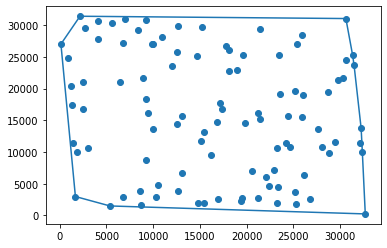

In [36]:
import matplotlib.pyplot as plt

# inputSet and outputSet should have been defined above. 
# uncomment the next two lines only if you wish to test the plotting code before coding your algorithm

#inputSet = [[1,1], [2,2] , [3, 3], [4,4], [1,4], [3,1], [1, 5], [2, 4], [3, 5]]
#outputSet = [[1,1], [3,1] , [4, 4], [3,5], [1,5]]

plt.figure()

#first do a scatter plot of the inputSet
input_xs, input_ys = zip(*inputSet)
plt.scatter(input_xs, input_ys)

#then do a polygon plot of the computed covex hull
outputSet.append(outputSet[0]) #first create a 'closed loop' by adding the first point at the end of the list
output_xs, output_ys = zip(*outputSet) 
plt.plot(output_xs, output_ys) 

plt.show() 